In [64]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [65]:
df = pd.read_csv("popcorndata.csv")

In [66]:
df.head()

,Unnamed: 0,Unpopped,Brand,Trial
0,1,26,Orville,1
1,2,35,Orville,2
2,3,18,Orville,3
3,4,14,Orville,4
4,5,8,Orville,5


In [85]:
features_df = df.drop(['Brand',df.columns[0]],axis = 1)
features_df.head()

,Unpopped,Trial
0,26,1
1,35,2
2,18,3
3,14,4
4,8,5


In [73]:
target_df = pd.DataFrame(df['Brand'])
target_df.head()

,Brand
0,Orville
1,Orville
2,Orville
3,Orville
4,Orville


In [74]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [75]:
dtree.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
tree_print(dtree,features_df)

if Unpopped =< 36.0: 
  |then if Unpopped =< 11.0: 
  |  |then Orville
  |  |else if Trial =< 2.5: 
  |  |  |then Orville
  |  |  |else if Unpopped =< 19.5: 
  |  |  |  |then if Unpopped =< 16.0: 
  |  |  |  |  |then if Trial =< 3.5: 
  |  |  |  |  |  |then Seaway
  |  |  |  |  |  |else Orville
  |  |  |  |  |else Orville
  |  |  |  |else Seaway
  |else Seaway
<---------------->
Tree Depth:  6


In [77]:
predict_array = dtree.predict(features_df)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Brand']

In [78]:
predicted_labels.head()

,Brand
0,Orville
1,Orville
2,Orville
3,Orville
4,Orville


In [79]:
target_df.head()

,Brand
0,Orville
1,Orville
2,Orville
3,Orville
4,Orville


In [80]:
predicted_labels.equals(target_df)

True

In [81]:
print("Our model accuracy is: {}".format(accuracy_score(target_df,predicted_labels)))

Our model accuracy is: 1.0


In [93]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
tree_print(dtree2,features_df)

if Unpopped =< 36.0: 
  |then if Trial =< 2.5: 
  |  |then Orville
  |  |else if Unpopped =< 19.5: 
  |  |  |then if Trial =< 3.5: 
  |  |  |  |then Orville
  |  |  |  |else Orville
  |  |  |else Seaway
  |else Seaway
<---------->
Tree Depth:  4


In [95]:
predict_array2 = dtree2.predict(features_df)      # produces an array of labels
predicted_labels2 = pd.DataFrame(predict_array2)  # turn it into a DF
predicted_labels2.columns = ['Species']           # name the column - same name as in target!

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is: 0.9166666666666666


In [96]:
df.drop(['Unnamed: 0'], axis= 1, inplace = True)

In [98]:
%matplotlib inline

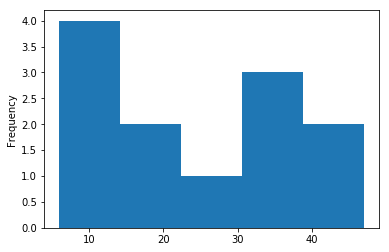

In [122]:
df.loc[:,'Unpopped'].plot.hist(bins=5)

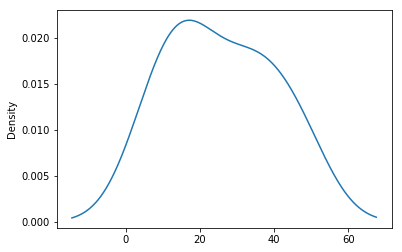

In [103]:
df.loc[:,'Unpopped'].plot.kde()

In [108]:
df.loc[:,'Brand'].value_counts()

Seaway     6
Orville    6
Name: Brand, dtype: int64

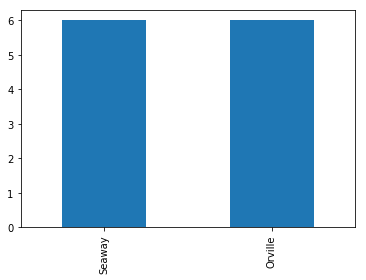

In [110]:
df.loc[:,'Brand'].value_counts().plot.bar()

In [112]:
plot_series = df.loc[:,'Brand'].rename('') 

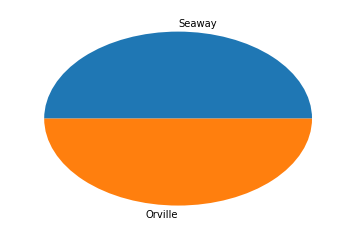

In [113]:
plot_series.value_counts().plot.pie()

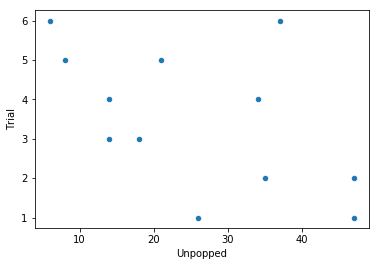

In [114]:
df.plot.scatter(x='Unpopped', y = 'Trial')

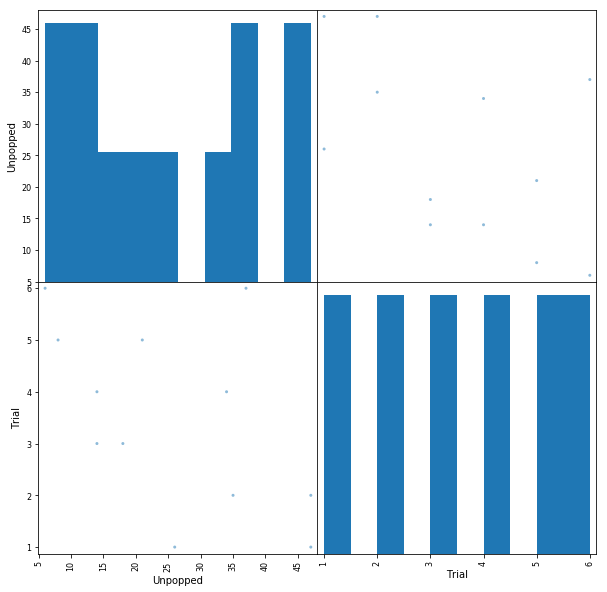

In [115]:
null = pd.plotting.scatter_matrix(df, figsize=[10,10])

In [116]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

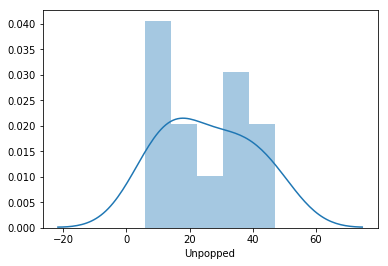

In [118]:
sns.distplot(df.loc[:,'Unpopped'], hist=True, kde=True, bins=5)

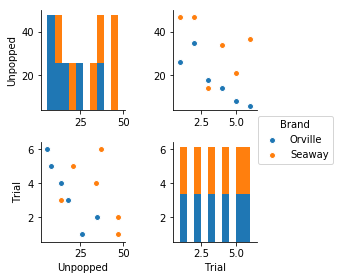

In [119]:
sns.pairplot(df, hue='Brand', size=2)